## Desafío - Regresión desde el aprendizaje de máquinas

### Contexto
En esta sesión trabajaremos una base de datos sobre los precios de las viviendas en Boston,
utilizada en el paper *Harrison Jr, D., & Rubinfeld, D. L. (1978). Hedonic housing prices and the
demand for clean air. Journal of environmental economics and management, 5(1), 81-102.*

Nuestro objetivo es desarrollar un modelo predictivo para el valor medio de las casas mediante el
entrenamiento de un modelo de regresión lineal.

`crim` : Tasa de criminalidad por sector de Boston.

`zn`   : Proporción de terreno residencial asignado para terrenos baldíos.

`indus`: Proporción de negocios no asociados al comercio por sector.

`chas` : Dummy, 1 si el sector colinda con el río Charles, 0 de lo contrario.

`nox`  : Concentración de dióxido de carbono.

`rm`   : Cantidad promedio de habitaciones por casa.

`age`  : Proporción de casas construídas antes de 1940.

`dis`  : Distancia promedio a cinco centros de empleos.

`rad`  : Índice de accesibilidad a autopistas.

`tax`  : Nivel de impuestos asociados a viviendas.

`ptratio` : Razón alumno:profesor por sector de Boston.

`black` : Proporción de afroamericanos por sector de Boston.

`lstat` : Porcentaje de población de estratos bajos.

`medv` : Valor medio de las casas.

### Desafío 1: Prepare el ambiente de trabajo
* Importe las librerías básicas para el análisis de datos.
* Importe el módulo `linear_model` , y las funciones `mean_squared_error` , `r2_score` y `train_test_split`.
* Importe la base de datos `boston.csv`y elimine la columna `Unnamed: 0`.
* Obtenga las medidas descriptivas de la base de datos con `describe()`.

crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677082   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio       black  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            lstat        medv  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

### Desafío 2: División de la muestra
* Genere conjuntos de entrenamiento y validación con `train_test_split`.
* Genere segmentaciones del 33% para las muestras de validación.
* Incluya una semilla pseudoaleatoria.

### Desafío 3: Generación de modelos
* Ahora implementaremos 4 versiones del modelo lineal:
    * Con intercepto y atributos normalizados.
    * Con intercepto y atributos no normalizados.
    * Sin intercepto y atributos normalizados.
    * Sin intercepto y atributos no normalizados.
* Cada versión debe generarse en un nuevo objeto inicializado.
* Posteriormente se deben entrenar los modelos especificando la matriz y vector de entrenamiento.
* Con los modelos entrenados, genere una predicción de matriz de validación.

### Desafío 4: Obtención de métricas
* Ahora generemos una función llamada `report_scores` que ingrese como argumentos: el vector de datos predichos y el vector de datos por validar.
* La función debe imprimir las métricas del Error Cuadrático Promedio y $R^2$.
* Reporte las métricas para los 4 modelos del **Desafío 3**, en base a ello, seleccione el mejor modelo.

In [9]:
# Con intercepto y atributos normalizados.
report_scores(train_model_1_yhat, y_test)

Error Cuadrático Promedio: 20.9
R^2: 0.704


### Desafío 5: Refactorización del modelo
* Genere una función llamada `fetch_features` que ingrese como argumentos la base de datos y el nombre del vector objetivo. El nombre del vector debe ser `medv` por defecto
* La función debe retornar una lista con las correlaciones absolutas entre cada atributo y el vector objetivo y su nombre.
* Reporte brevemente cuales los 6 atributos con una mayor correlación con `medv`.

           abscor
attr             
lstat    0.737663
rm       0.695360
ptratio  0.507787
indus    0.483725
tax      0.468536
nox      0.427321
crim     0.388305
rad      0.381626
age      0.376955
zn       0.360445
black    0.333461
dis      0.249929
chas     0.175260


### Desafío 6: Refactorización del modelo predictivo
* Genere otros conjuntos de entrenamiento y validación en base a una matriz con los 6 atributos identificados y el vector objetivo.
* Entrene el modelo.
* Reporte las métricas para el nuevo modelo.

In [16]:
report_scores(retrain_model_1_yhat, y_test)

Error Cuadrático Promedio: 26.5
R^2: 0.625


### Desafío 7: Predicción de casos
A continuación se generaron dos arrays que representan el peor escenario posible:

`worst_neighbor : [37.9, 12.6, 3.5, 27.7, 187, 0.87]`

y el mejor escenario posible

`best_neighbor : [1.73, 22, 8.7, 0.46, 711, 0.38]`

Ingrese los arrays en el modelo entrenado y reporte cuál sería el valor esperado dada las
condiciones. Trate de interpretar

In [19]:
retrain_model_1.predict(best_neighbor)

array([122.2912908])

### Bonus : Variación de la muestra.

Realice una iteración sobre los porcentajes, contruya un modelo para cada iteración y grafice la variación del $R^2$.

Text(0, 0.5, 'Valor de $R^2$')

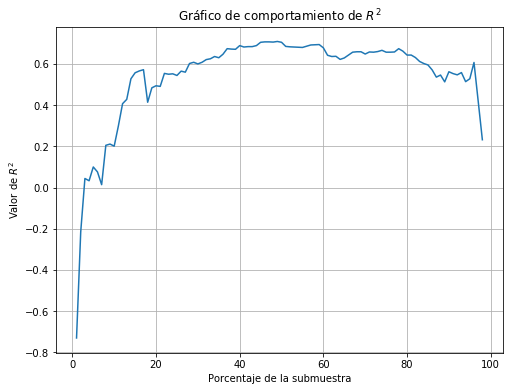